## DataLoader
`from torch.utils.data import DataLoader`

### Tuts & Docs
https://pytorch.org/tutorials/beginner/data_loading_tutorial.html

---

In [1]:
import matplotlib.pyplot as plt
import torch
import torch.utils.data
import torchvision
from torchvision import datasets, transforms

In [2]:
mnist_train = datasets.MNIST(
    '../data',
    train=True,
    download=True,
    transform=transforms.Compose([transforms.ToTensor()]))

In [3]:
data_loader = torch.utils.data.DataLoader(mnist_train, batch_size=10, shuffle=True)
data_loader

In [4]:
batch = next(data_loader)

TypeError: 'DataLoader' object is not an iterator

In [5]:
batch = next(iter(data_loader))

In [6]:
print(type(batch))


<class 'list'>


In [7]:
print(len(batch))

2


In [8]:
print([type(o) for o in batch])

[<class 'torch.Tensor'>, <class 'torch.Tensor'>]


In [9]:
print([o.size() for o in batch])

[torch.Size([10, 1, 28, 28]), torch.Size([10])]


In [10]:
print([o.dtype for o in batch])

[torch.float32, torch.int64]


In [11]:
batch[0].mean(), batch[0].std(), batch[0].min(), batch[0].max()

(tensor(0.1470), tensor(0.3274), tensor(0.), tensor(1.))

[3 0 3 8 3 1 3 9 7 4]


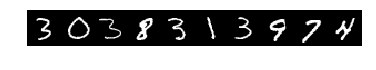

[2 5 7 0 5 3 9 7 1 8]


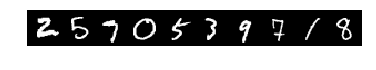

[8 4 6 8 4 5 3 6 0 2]


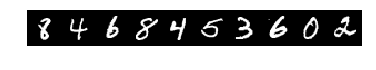

[2 3 1 1 5 9 1 6 1 2]


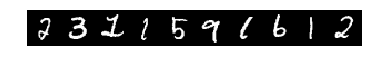

In [12]:
for i_batch, batch in enumerate(data_loader):
#     print(i_batch, batch[0].size(), batch[1].size())
    print(batch[1].numpy())
    images, labels = batch[0], batch[1]
    grid = torchvision.utils.make_grid(images, nrow=10)
    plt.imshow(grid.permute((1, 2, 0)))
    plt.axis('off')
    plt.show()
    if i_batch == 3:
        break